In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')


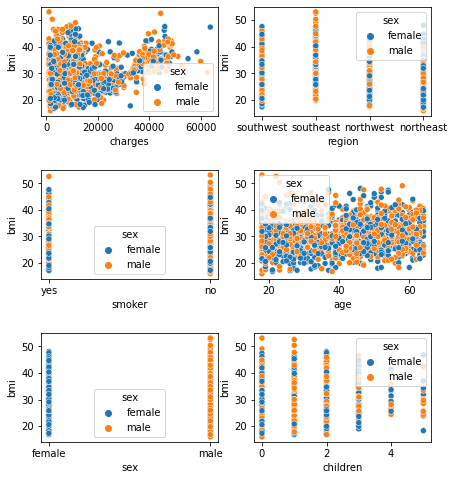

In [2]:
#Keşifsel Veri Analizi Madde 3
df = pd.read_csv("insurance.csv")
fig, axes = plt.subplots(3,2, figsize=(7, 8))
sns.scatterplot(data=df, x = "charges", y = "bmi", hue = "sex", ax = axes[0,0])
sns.scatterplot(data=df, x = "region", y = "bmi", hue = "sex",ax = axes[0,1])
sns.scatterplot(data=df, x = "smoker", y = "bmi", hue = "sex",ax = axes[1,0])
sns.scatterplot(data=df, x = "age", y = "bmi", hue = "sex",ax = axes[1,1])
sns.scatterplot(data=df, x = "sex", y = "bmi", hue = "sex",ax = axes[2,0])
sns.scatterplot(data=df, x = "children", y = "bmi", hue = "sex",ax = axes[2,1])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # It prevents the overlapping of texts
#Bu komut metinlerin üst üste gelmesini önler

# It seems, there are relationship with the charges and bmi features.
#Görünen o ki, masraflar ve bmi özellikleri arasında bir ilişki var.

In [3]:
#“bmi” ile “charges”
df.groupby("smoker")['charges'].mean()
# It is clearly seen, If people are smoker, ınsurance charges are higher.
#Açıkça görülüyorki, Kişiler sigara içiyorsa sigorta ücretleri daha yüksek

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

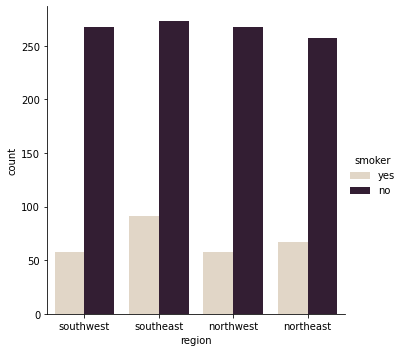

In [4]:
#region and smoker
sns.catplot(x="region", kind="count", palette="ch:.25", hue = "smoker", data=df)
# All regions have almost the same smoker size. In addition, southeast region has a little bit more smoker size.
#Tüm bölgeler neredeyse aynı sigara içen boyutuna sahiptir. Ayrıca güneydoğu bölgesi biraz daha fazla sigara içen bir boyuta sahiptir.

          age       bmi
age  1.000000  0.109272
bmi  0.109272  1.000000


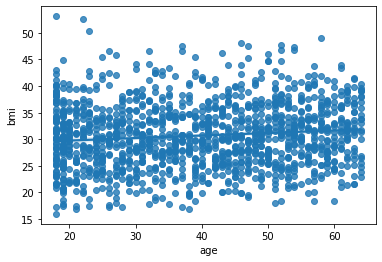

In [5]:
#age and bmi
sns.regplot(data=df, x="age", y="bmi")
corr_number = df[["age","bmi"]].corr()
print(f"{corr_number}")
# Correlation number is 0.109, so there is weak correlation.
#Korelasyon sayısı 0.109'dur, dolayısıyla zayıf bir korelasyon vardır.

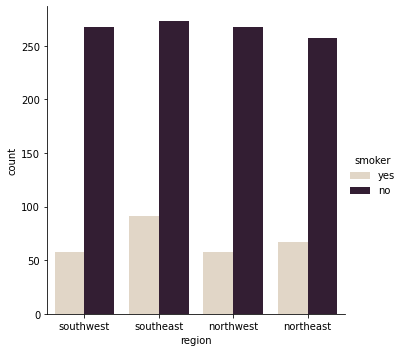

In [6]:
#region and smoker
sns.catplot(x="region", kind="count", palette="ch:.25", hue = "smoker", data=df)
# All regions have almost the same smoker size. In addition, southeast region has a little bit more smoker size.
#Tüm bölgeler neredeyse aynı sigara içen boyutuna sahiptir. Ayrıca güneydoğu bölgesi biraz daha fazla sigara içen bir boyuta sahiptir.

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


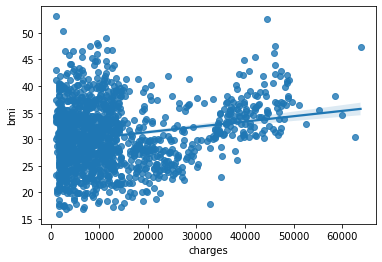

In [7]:
#“bmi” ile “charges”
sns.regplot(data=df, x = "charges", y = "bmi")
df[["charges", "bmi"]].corr()

In [8]:
df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#Veri Ön İşleme Madde 4

df.sex.replace(['male', 'female'], [1, 0], inplace=True)
df.smoker.replace(['yes', 'no'], [1, 0], inplace=True)
df.region.replace(['southwest','southeast', 'northwest', 'northeast'], [0,1,2,3], inplace=True)

### LabelEncoder ile alternatif bir kategorik değişken dönüşümü

#labelencoder = LabelEncoder()
#labelencoder.fit(df.sex.drop_duplicates()) 
#df.sex = labelencoder.transform(df.sex)

#labelencoder.fit(df.smoker.drop_duplicates()) 
#df.smoker = labelencoder.transform(df.smoker)

#labelencoder.fit(df.region.drop_duplicates()) 
#df.region = labelencoder.transform(df.region)

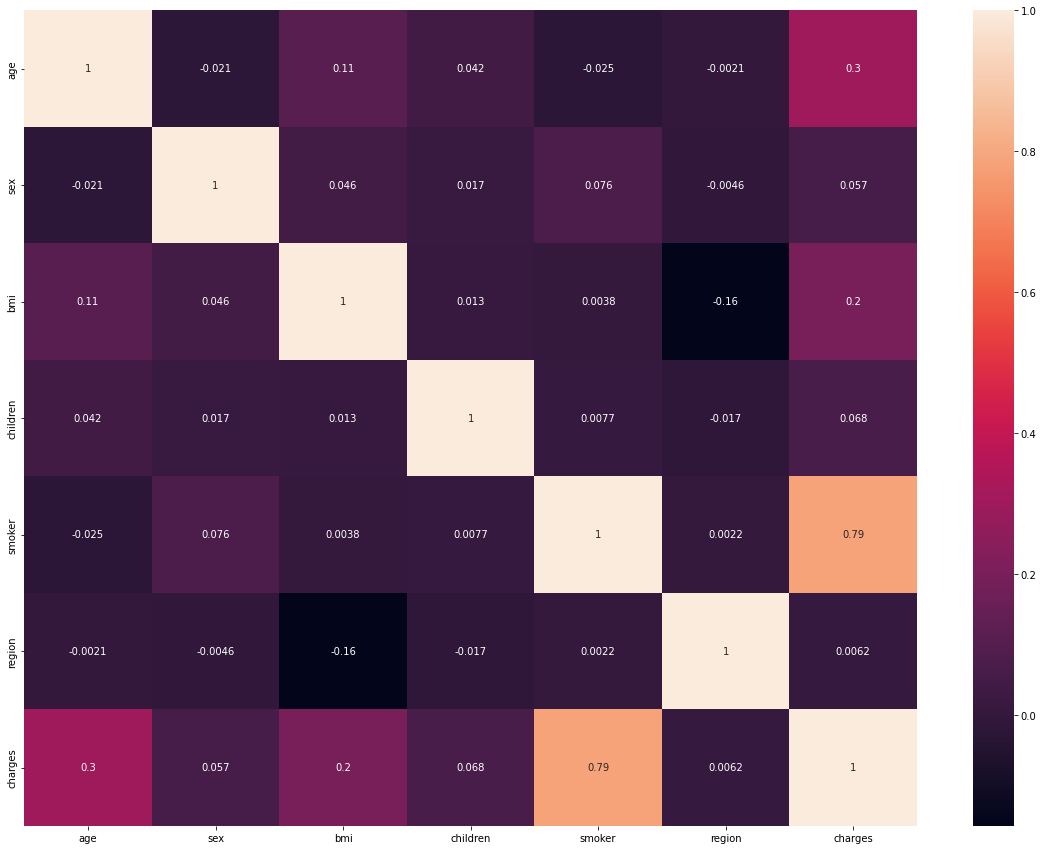

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
x = df.drop(['charges'], axis = 1)
y = df.charges

steps = [('scaler', StandardScaler()),
('dec_tree', LinearRegression())]
pipeline = Pipeline(steps)
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(pipeline.score(x_test,y_test))

0.7668905583460909


In [15]:
#Model Seçme Madde 5
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestRegressor())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                       ("XGB",XGBRegressor())])

pipeline_svm=Pipeline([("scalar6",StandardScaler()),
                      ("SVM",SVR())])

pipeline_abr=Pipeline([("scalar7",StandardScaler()),
                      ("ABR",AdaBoostRegressor())])

pipeline_gbr=Pipeline([("scalar8",StandardScaler()),
                      ("GBR",GradientBoostingRegressor())])

pipeline_cbr=Pipeline([("scalar9",StandardScaler()),
                      ("CBR",CatBoostRegressor(logging_level='Silent'))])

pipeline_lasso=Pipeline([("scalar10",StandardScaler()),
                      ("Lasso",Lasso())])

pipeline_ridge=Pipeline([("scalar11",StandardScaler()),
                      ("Ridge",Ridge())])

pipeline_br=Pipeline([("scalar12",StandardScaler()),
                      ("BR",BayesianRidge())])

pipeline_en=Pipeline([("scalar13",StandardScaler()),
                      ("EN",ElasticNet())])

pipeline_hr=Pipeline([("scalar14",StandardScaler()),
                      ("HR",HuberRegressor())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb,pipeline_svm,pipeline_abr,pipeline_gbr,pipeline_cbr,pipeline_lasso,pipeline_ridge,
            pipeline_br,pipeline_en,pipeline_hr]

In [16]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)
    cv = ShuffleSplit(n_splits=5, random_state=42)

    scores = cross_val_score(pipe, x_test,y_test, cv=cv)
    print(pipe[1], "%0.2f accuracy" % (scores.mean()))
    
    #y_pred = pipe.predict(x_test)
    #print(pipe, pipe.score(x_test,y_test))

LinearRegression() 0.78 accuracy
DecisionTreeRegressor() 0.75 accuracy
RandomForestRegressor() 0.85 accuracy
KNeighborsRegressor() 0.83 accuracy
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 0.79 accuracy
SVR() -0.11 accuracy
AdaBoostRegressor() 0.78 accuracy
GradientBoostingRegressor() 0.82 accuracy
<catboost.core.CatBoostRegressor object at 0x15a45b4f0>

In [17]:
#Hiperparametre Optimizasyonu Madde 6
rf_model = RandomForestRegressor()
rf_model.get_params()

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

rf_gs_best = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1,verbose=1).fit(x_train, y_train)

rf_gs_best.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 15,
 'max_features': 5,
 'min_samples_split': 20,
 'n_estimators': 200}

In [18]:
#Modeli Değerlendirme Madde 7

rf_final = rf_model.set_params(**rf_gs_best.best_params_).fit(x_train, y_train)

steps = [('scaler', StandardScaler()),
('model', rf_final)]
pipeline = Pipeline(steps)
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print("%0.2f accuracy" % pipeline.score(x_test,y_test))

0.86 accuracy


In [19]:
# Bir makine öğrenmesi modelinin, tahminleyicinin tahmin ettiği değerler ile gerçek değerleri arasındaki 
# uzaklığın bulunmasında sıklıkla kullanılan, hatanın büyüklğünü ölçen kuadratik bir metriktir. 
# RMSE tahmin hatalarının standart sapmasıdır. Yani, tahmin edilmesi istenen veri noktalarının, regresyon hattının 
# veri noktalarından ne kadar uzakta olduğunun bir ölçüsüdür; RMSE ise bu hataların ne kadar yayıldığının 
# bir ölçüsüdür. Başka bir deyişle, verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler.
# RMSE değeri 0’dan ∞’a kadar değişebilir. Negatif yönelimli puanlar yani daha düşük değerlere sahip 
# tahminleyiciler daha iyi performans gösterir. RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına 
# gelir. RMSE, büyük hataları daha fazla cezalandırmanın avantajına sahiptir, bu yüzden bazı durumlara daha 
# uygun olabilir. RMSE, birçok matematiksel hesaplamada istenmeyen mutlak değerin kullanılmasını engeller.

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4522.403036540002
